## The softmax function

In [2]:
import numpy as np
def softmax(X, deriv=False): 
    if deriv==True: 
        """
        Here X is a output matrix, each row is one output, 
        the number of columns is the number of output neurons, 
        the number of rows is the number of outputs(or the same, inputs) in each batch
        """
        return X*(1-X)  #the derivative of softmax function
    else: 
        """
        Here X is a matrix, each row corresponds to values which are linear combinations of 
        one input by the synapse weights. 
        And the softmax transforms these values into range (0,1) by applying the formula
        """
        exp_X=np.exp(X)
        sum_exp_X=np.sum(exp_X, axis=1) #sum up each row to one value
        sum_exp_X=np.expand_dims(sum_exp_X,axis=1) #expand the dimension, make it into 2D array, each row only containing 1 value
        return exp_X/sum_exp_X
        

## Import MNIST dataset

In [3]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as dsets
train_dataset= dsets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset= dsets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)
len(train_dataset)

60000

In [4]:
#train_dataset_np=train_dataset[0][0].numpy()
#test_dataset_np=test_dataset.numpy()
print(type(train_dataset))
#print(type(train_dataset_np))

<class 'torchvision.datasets.mnist.MNIST'>


## Training

In [15]:
#initialization
np.random.seed(1) #To make the process reproducible
#syn0 = 2*np.random.random((784,10)) - 1 #synapses (weights) connecting layer0 and layer1, and initialize weights randomly with mean 0
syn0 = np.random.normal(0,0.7,(784,10)) #
bias=np.zeros((20,10)) #every row of the bias should be the same

for i in range(0,len(train_dataset),20):
    input_batch=train_dataset[i][0].numpy().flatten()

    for j in range(i+1,i+20):
        input_batch=np.vstack((input_batch,train_dataset[j][0].numpy().flatten()))
    #the input batch is a 20*784 matrix, each row represents one image
    #print(input_batch.shape) 
    
    labels=np.zeros((20,10))
    for j in range(0,20):
        labels[j][train_dataset[i+j][1]]=1
    
    
    l0=input_batch #layer1 gets the input
    l1 = softmax(np.dot(l0,syn0)+bias) #layer2 gets the weighted input from l0 and cast the softmax function to it
    
    l1_loss=np.sum((labels-l1)**2, axis=1)/10 #mean squared error
    
    l1_error=1/10*2*(labels-l1)*softmax(l1,True) 
    l1_delta=np.dot(l0.T,l1_error) #gradient descent: the partial derivative of loss function with respect to each weight is added to the original weight
    syn0+=l1_delta #update the weights
    new_bias=bias[0,]+np.sum(l1_error,axis=0) #sum up the gradients resulting from all 20 input, and update the first row of the bias matrix
    bias=np.tile(new_bias,(20,1)) #duplicate the first row to overwrite other rows of the bias matrix

print("The correct labels of the last training input:")
print(labels)
print("The last training output:")
print(l1)


The correct labels of the last training input:
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]
The last training output:
[[  6.42510301e-05   1.76794194e-04   9.94262615e-04   9.95485590e

## Testing

In [16]:
num_corr_pred=0 #count the number of correct predictions

for i in range(0,len(test_dataset)):
    label_test=test_dataset[i][1]
    l0_test=test_dataset[i][0].numpy().flatten()
    l1_test=softmax(np.dot(l0_test,syn0)+bias)
    if np.argmax(l1_test)==label_test:
        num_corr_pred+=1
    
print("The correct rate of prediction on the test data:", num_corr_pred/len(test_dataset))
    

The correct rate of prediction on the test data: 0.8887


<class 'torchvision.datasets.mnist.MNIST'>
<class 'tuple'>
<class 'torch.FloatTensor'>
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.  

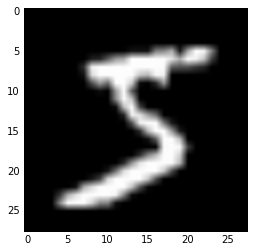

In [11]:
print(type(train_dataset))
print(type(train_dataset[0]))
print(type(train_dataset[0][0]))
print(train_dataset[0][0].numpy().flatten()[0:200])
print(train_dataset[0][0].numpy().shape)
import matplotlib.pyplot as plt
plt.imshow(train_dataset[0][0].numpy().flatten().reshape((28,28))*255, cmap='gray')
#check if the imported matrices can be converted to image
plt.show()